In [105]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [106]:
df = pd.read_csv("crop_yield.csv")
df

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
...,...,...,...,...,...,...,...,...,...,...
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [109]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Crop_Year,19689.0,2.009128e+03,6.498099e+00,1997.00,2004.00,2010.00,2.015000e+03,2.020000e+03
Area,19689.0,1.799266e+05,7.328287e+05,0.50,1390.00,9317.00,7.511200e+04,5.080810e+07
Production,19689.0,1.643594e+07,2.630568e+08,0.00,1393.00,13804.00,1.227180e+05,6.326000e+09
Annual_Rainfall,19689.0,1.437755e+03,8.169096e+02,301.30,940.70,1247.60,1.643700e+03,6.552700e+03
Fertilizer,19689.0,2.410331e+07,9.494600e+07,54.17,188014.62,1234957.44,1.000385e+07,4.835407e+09
Pesticide,19689.0,4.884835e+04,2.132874e+05,0.09,356.70,2421.90,2.004170e+04,1.575051e+07
Yield,19689.0,7.995401e+01,8.783062e+02,0.00,0.60,1.03,2.388889e+00,2.110500e+04


In [110]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [111]:
datacorr=df.copy()

In [112]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = datacorr.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    datacorr[column] = label_encoder.fit_transform(datacorr[column])

In [113]:

datacorr = datacorr.drop(columns=['Fertilizer'])

In [114]:
scaler = StandardScaler()

In [115]:
numerical_columns = datacorr.select_dtypes(include=['float64', 'int64']).columns
datacorr[numerical_columns] = scaler.fit_transform(datacorr[numerical_columns])

print(datacorr)

       Crop  Crop_Year  Season  State      Area  Production  Annual_Rainfall  \
0         0  -1.866375       4      2 -0.144802   -0.062267         0.751197   
1         1  -1.866375       1      2 -0.236473   -0.062464         0.751197   
2         8  -1.866375       1      2 -0.244443   -0.062482         0.751197   
3         9  -1.866375       4      2 -0.218707    0.419954         0.751197   
4        11  -1.866375       1      2 -0.243157   -0.062479         0.751197   
...     ...        ...     ...    ...       ...         ...              ...   
19684    44  -1.712480       1     19 -0.240071   -0.062475         0.073749   
19685    53  -1.712480       2     19 -0.244165   -0.062471         0.073749   
19686    24  -1.866375       1     10  0.178704   -0.060806        -0.099836   
19687    40  -1.866375       1     10  0.130756   -0.062461        -0.099836   
19688    53  -1.866375       2     10  0.081082   -0.060991        -0.099836   

       Pesticide     Yield  
0      -0.

In [116]:
datacorr.describe().T

,count,mean,std,min,25%,50%,75%,max
Crop,19689.0,2.935766e+01,15.560857,0.000000,17.000000,31.000000,43.000000,54.000000
Crop_Year,19689.0,-1.516286e-14,1.000025,-1.866375,-0.789110,0.134261,0.903736,1.673211
Season,19689.0,2.037381e+00,1.222513,0.000000,1.000000,2.000000,3.000000,5.000000
State,19689.0,1.432881e+01,9.000461,0.000000,7.000000,14.000000,22.000000,29.000000
Area,19689.0,2.598358e-17,1.000025,-0.245529,-0.243633,-0.232816,-0.143031,69.087716
Production,19689.0,0.000000e+00,1.000025,-0.062482,-0.062477,-0.062430,-0.062016,23.986163
Annual_Rainfall,19689.0,-3.464478e-17,1.000025,-1.391199,-0.608473,-0.232780,0.252109,6.261494
Pesticide,19689.0,-1.010473e-17,1.000025,-0.229031,-0.227359,-0.217676,-0.135064,73.619280
Yield,19689.0,1.876592e-17,1.000025,-0.091034,-0.090351,-0.089862,-0.088314,23.938781


<Axes: >

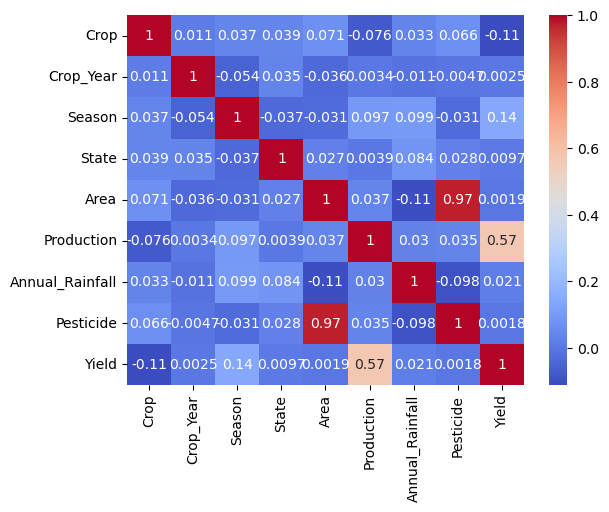

In [117]:
sns.heatmap(datacorr.corr() , annot= True , cmap='coolwarm')

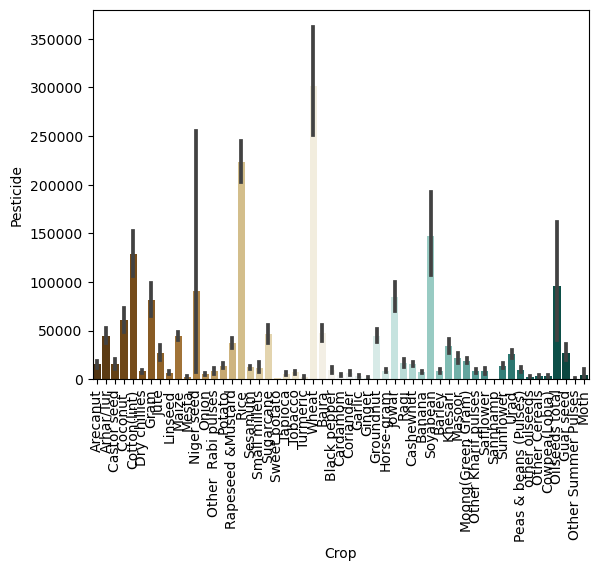

In [118]:
sns.barplot(data=df, x = df.Crop, y = df['Pesticide'],palette='BrBG')
plt.xticks(rotation=90)
plt.show()

In [119]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import SGDRegressor


In [123]:
X, y = datacorr.drop(labels='Yield', axis=1), datacorr['Yield']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [125]:
print(X_train.shape)

(13782, 8)


In [126]:
print(X_test.shape)

(5907, 8)


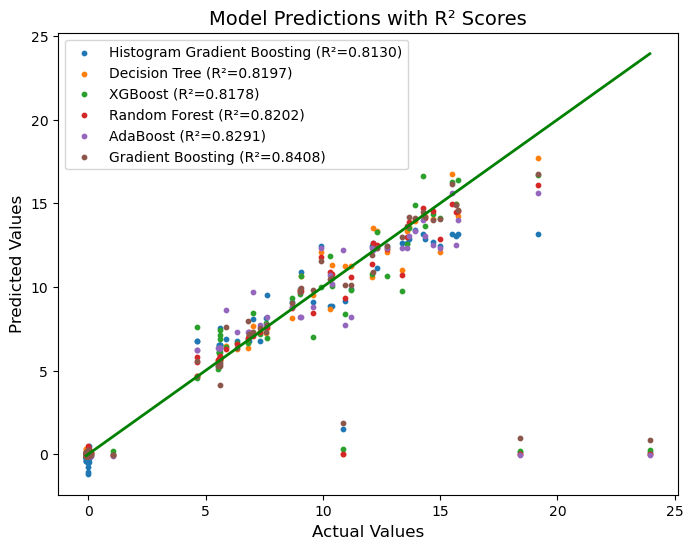

In [127]:

# Initialize models
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import SGDRegressor

import matplotlib.pyplot as plt
import pandas as pd

models = [
    ('Histogram Gradient Boosting', HistGradientBoostingRegressor(random_state=42)),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('AdaBoost', AdaBoostRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42))
]

results = []

plt.figure(figsize=(8, 6))

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    mae=mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results.append((name, accuracy, mse, r2))
    train_acc = model.score(X_train, y_train) * 100
    test_acc = accuracy * 100
  #  print(f'The accuracy of the {name} Model Train is {train_acc:.2f}')
  #  print(f'The accuracy of the {name} Model Test is {test_acc:.2f}')
    
    plt.scatter(y_test, y_pred, s=10, label=f'{name} (R²={r2:.4f})')

# Plot settings
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth=2)
plt.title('Model Predictions with R² Scores', fontsize=14)
plt.legend(loc='best')

# Annotate R² Scores
#vertical_offset = (max(y_test) - min(y_test)) * 0.1
#for i, (name, model) in enumerate(models):
#    r2 = results[i][3]
#    plt.text(min(y_test) + (max(y_test) - min(y_test)) * 0.05, 
#             max(y_test) - vertical_offset * (i + 1),
#             f'{name} R²={r2:.2f}', fontsize=9, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
plt.savefig("r2score.jpg", dpi=300)
plt.show()

# Creating a DataFrame to display results
#dff = pd.DataFrame(results, columns=['Model', 'Accuracy' ,'MSE', 'R2_score'])

# Styling the DataFrame
#df_styled_best = dff.style.highlight_max(subset=['Accuracy', 'R2_score'], color='green').highlight_min(subset=['MSE'], color='green').highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy', 'R2_score'], color='red')

#display(df_styled_best)



In [48]:
from sklearn.linear_model import SGDRegressor

results = []

models = [
    ('Histogram Gradient Boosting', HistGradientBoostingRegressor(random_state=42)),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('AdaBoost', AdaBoostRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
]

for name, model in models:
    if name == 'GaussianNB':  # Special handling for Naive Bayes classification
        y_train_class = (y_train > y_train.median()).astype(int)
        y_test_class = (y_test > y_test.median()).astype(int)
        model.fit(X_train, y_train_class)
        y_pred_class = model.predict(X_test)
        accuracy = accuracy_score(y_test_class, y_pred_class)
        results.append((name, accuracy, 'N/A', 'N/A', 'N/A', 'N/A'))
        print(f'The accuracy of the {name} Model Test is {accuracy:.2f}')
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = model.score(X_test, y_test)
        MSE = mean_squared_error(y_test, y_pred)
        MAE = mean_absolute_error(y_test, y_pred)
        RMSE= np.sqrt(MSE)
        #MAPE = mean_absolute_percentage_error(y_test, y_pred)
        R2_score = r2_score(y_test, y_pred)
        results.append((name, accuracy, MAE, MSE, RMSE, R2_score))
        
        print(name)
        num_folds = 5
        kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
        scores = cross_val_score(model, X, y, cv=kf)
    
        for fold, score in enumerate(scores):
            print(f"Fold {fold+1}: {score}")
    
        mean_score = np.mean(scores)
        print(f"Mean Score: {mean_score}")
        print('-' * 30)

# Creating DataFrame to display results
df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MAE', 'MSE', 'RMSE', 'R2_score'])

# Styling the DataFrame
df_styled_best = df.style.highlight_max(subset=['Accuracy', 'R2_score'], color='lightblue').highlight_min(subset=['MAE', 'MSE', 'RMSE'], color='lightblue').highlight_max(subset=['MAE', 'MSE', 'RMSE'], color='red').highlight_min(subset=['Accuracy', 'R2_score'], color='red')

display(df_styled_best)


Histogram Gradient Boosting
Fold 1: 0.9013062176397602
Fold 2: 0.9017862536461901
Fold 3: 0.9667088032609956
Fold 4: 0.9737913361660094
Fold 5: 0.9775190202720463
Mean Score: 0.9442223261970003
------------------------------
Decision Tree
Fold 1: 0.8686447305330589
Fold 2: 0.9822636142583038
Fold 3: 0.9643449333439499
Fold 4: 0.9894288697096513
Fold 5: 0.9853206857430364
Mean Score: 0.9580005667175999
------------------------------
XGBoost
Fold 1: 0.8684082507602455
Fold 2: 0.9841478376274625
Fold 3: 0.9835173863928974
Fold 4: 0.9865284884055281
Fold 5: 0.9844731907957184
Mean Score: 0.9614150307963705
------------------------------
Random Forest
Fold 1: 0.9077660228457138
Fold 2: 0.937295995687674
Fold 3: 0.9832387790060353
Fold 4: 0.9902440455915339
Fold 5: 0.9833666974334554
Mean Score: 0.9603823081128825
------------------------------
AdaBoost
Fold 1: 0.8357583314697782
Fold 2: 0.9605974769916389
Fold 3: 0.9369875537715089
Fold 4: 0.9581743234086775
Fold 5: 0.9456481516314674
Mean 

,Model,Accuracy,MAE,MSE,RMSE,R2_score
0,Histogram Gradient Boosting,0.813025,0.022416,0.188349,0.433992,0.813025
1,Decision Tree,0.819743,0.014686,0.181582,0.426124,0.819743
2,XGBoost,0.817762,0.017496,0.183577,0.428459,0.817762
3,Random Forest,0.820164,0.014563,0.181158,0.425626,0.820164
4,AdaBoost,0.829131,0.021894,0.172125,0.414880,0.829131
5,Gradient Boosting,0.840845,0.016341,0.160325,0.400406,0.840845


In [128]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

X, y = datacorr.drop(labels='Yield', axis=1), datacorr['Yield']

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and instantiate the model
#model = HistGradientBoostingRegressor(random_state=42)
model= GradientBoostingRegressor(random_state=42)
#model=DecisionTreeRegressor(random_state=42)
#model=XGBRegressor(random_state=42)
#model=RandomForestRegressor(random_state=42)
#model=AdaBoostRegressor(random_state=42)

# Fit the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test = model.predict(X_test)

# Make predictions on the training data
y_pred_train = model.predict(X_train)

# Evaluate test accuracy (R² Score)
test_accuracy = model.score(X_test, y_test)

# Evaluate training accuracy (R² Score)
train_accuracy = model.score(X_train, y_train)

# Calculate Mean Squared Error (MSE) on the test data
mse = mean_squared_error(y_test, y_pred_test)

# Calculate R² score on the test data
r2 = r2_score(y_test, y_pred_test)
MAE = mean_absolute_error(y_test, y_pred_test)
RMSE=root_mean_squared_error(y_test, y_pred_test)
#RMSE= np.sqrt(MSE)
# Print the results
print(f"Training Accuracy (R² Score): {train_accuracy:.2f}")
print(f"Test Accuracy (R² Score): {test_accuracy:.2f}")

print(f"MAE: {MAE:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {RMSE:.4f}")
print(f"R2 Score: {r2:.4f}")


Training Accuracy (R² Score): 1.00
Test Accuracy (R² Score): 0.93
MAE: 0.0151
MSE: 0.0685
RMSE: 0.2618
R2 Score: 0.9340


In [129]:
print(X_train.shape)

(15751, 8)


In [130]:
print(X_test.shape)

(3938, 8)


In [133]:
X_test.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Pesticide
18238,36,1.057631,1,10,-0.245243,-0.062478,-0.654869,-0.228687
6918,24,-1.558585,2,20,-0.234244,-0.062443,0.056978,-0.218563
4894,37,1.057631,5,17,-0.236877,-0.062315,2.937174,-0.218626
10960,38,-0.173530,0,11,-0.204907,-0.062379,-0.174510,-0.216470
15615,8,1.211526,1,14,-0.233316,-0.062463,-0.780712,-0.213086


In [134]:
import shap

In [135]:
shap.initjs()

In [136]:
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

In [137]:
print(X_test.shape)

(3938, 8)


In [138]:
X_test.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Pesticide
18238,36,1.057631,1,10,-0.245243,-0.062478,-0.654869,-0.228687
6918,24,-1.558585,2,20,-0.234244,-0.062443,0.056978,-0.218563
4894,37,1.057631,5,17,-0.236877,-0.062315,2.937174,-0.218626
10960,38,-0.173530,0,11,-0.204907,-0.062379,-0.174510,-0.216470
15615,8,1.211526,1,14,-0.233316,-0.062463,-0.780712,-0.213086


In [139]:
x_shap = pd.DataFrame(shap_values)
x_shap.head()

,0,1,2,3,4,5,6,7
0,-0.002077,0.001381,-0.000565,-0.002570,0.176064,-0.284374,0.001092,0.022119
1,-0.001798,-0.001569,-0.000565,0.004773,0.023650,-0.126946,-0.000300,0.013687
2,-0.002108,0.001399,0.002246,-0.002758,0.021746,-0.118466,-0.000522,0.013178
3,-0.002077,-0.000187,-0.000565,-0.002678,0.001507,-0.093429,-0.000113,0.008978
4,0.010083,0.001406,-0.000565,-0.002712,0.023541,-0.127356,0.000672,0.009264


In [140]:
print('Expected Value: ', explainer.expected_value)

Expected Value:  [0.00020988]


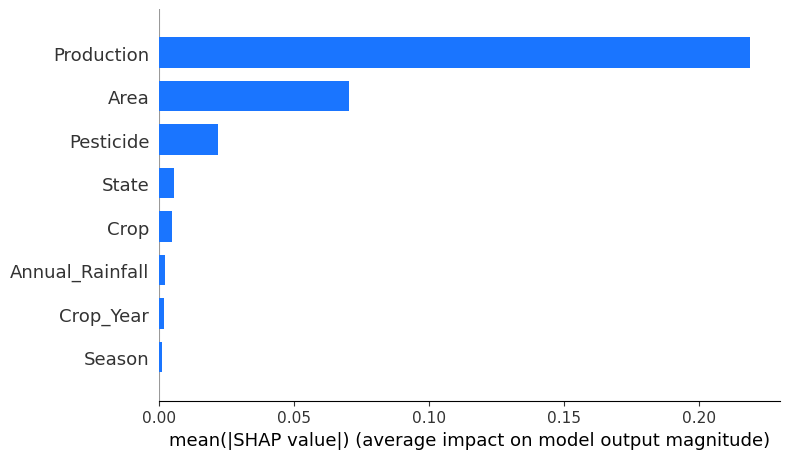

In [141]:
#x_test = pd.DataFrame(x_test, columns=['Avg Glucose Level', 'Age', 
#    'Heart Disease', 'Hypertension', 'Ever Married'])
X_test=pd.DataFrame(X_test,columns=['Crop','Crop_Year','Season','State','Area',
    'Production','Annual_Rainfall','Pesticide'])
# x_test = pd.DataFrame(x_test, columns=['Avg Glucose Level', 'Age', 'Heart Disease', 'Hypertension', 'Ever Married', 'Gender', 'Work Type', 'Residence Type', 'BMI', 'Smoking Status'])
shap.summary_plot(shap_values, X_test, plot_type="bar", color='#1a75ff')

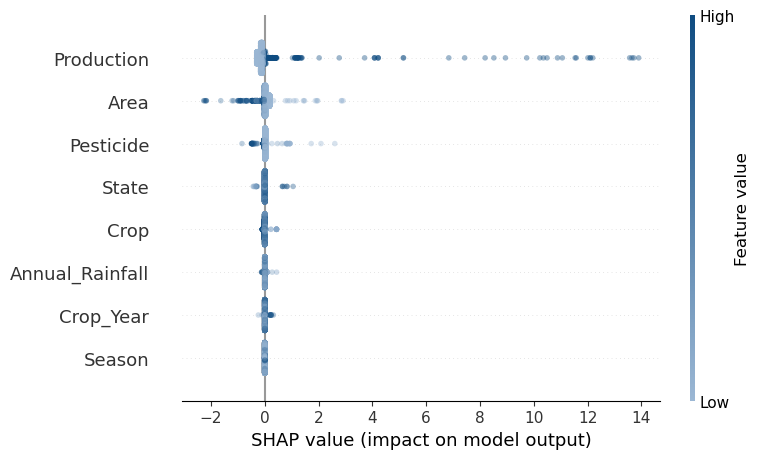

In [144]:
import matplotlib
colors = ["#9bb7d4", "#0f4c81"]           
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
shap.summary_plot(shap_values, X_test,cmap=cmap,alpha=0.4)

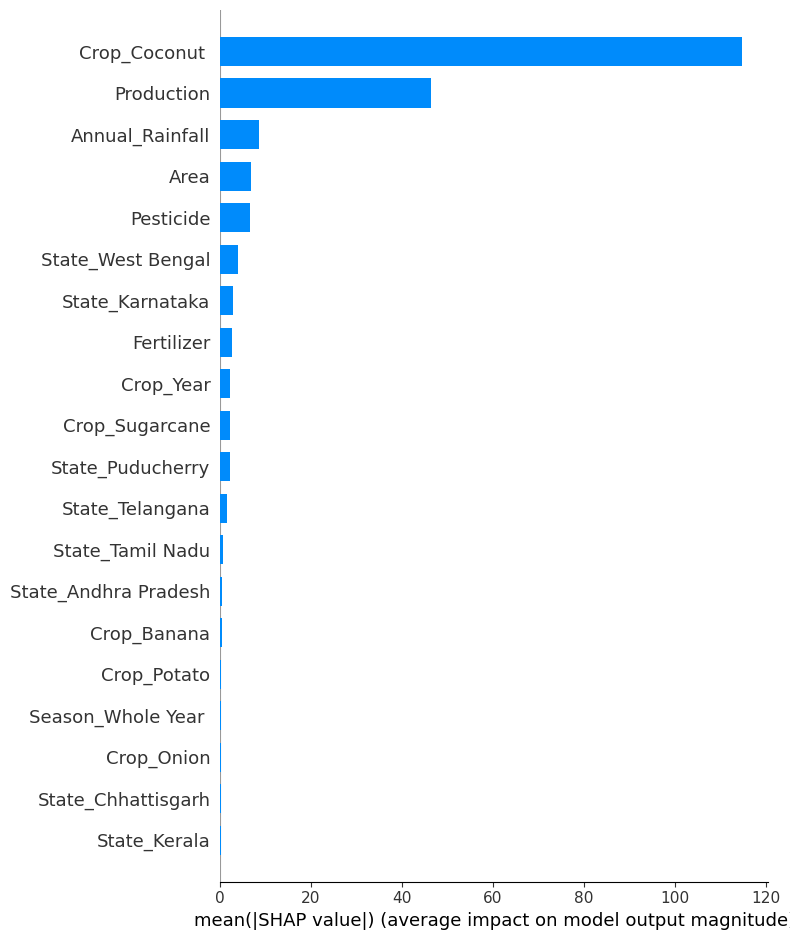

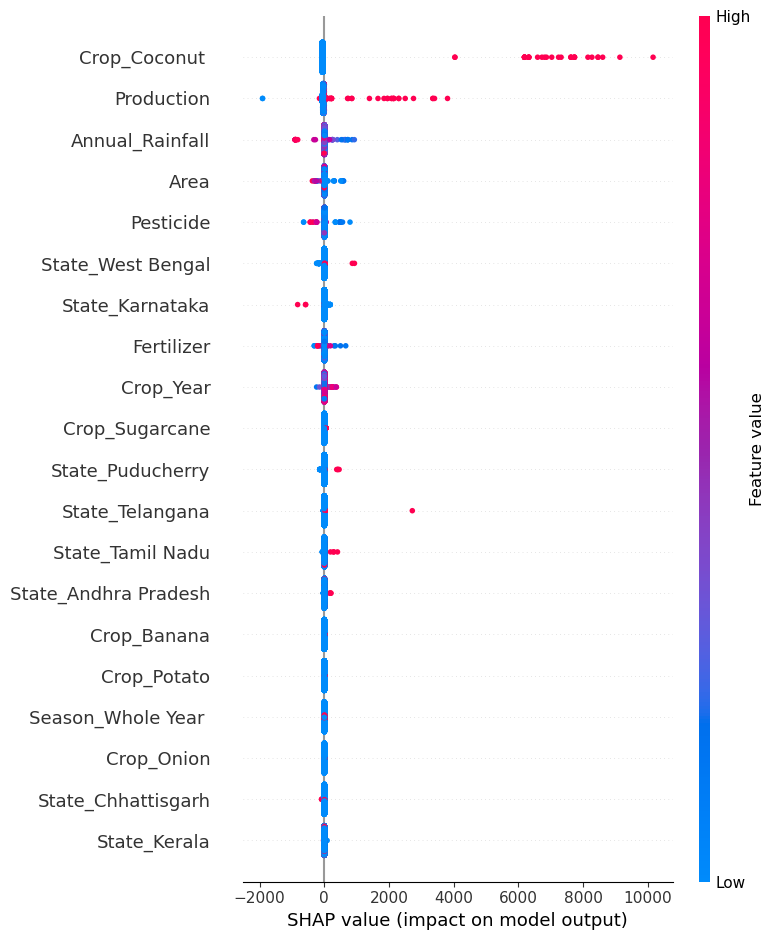

In [73]:
import pandas as pd
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import shap

data = pd.read_csv("crop_yield.csv")

# Preprocess the dataset
# Convert categorical columns to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Crop', 'Season', 'State'])

# Separate features and target variable
X = data_encoded.drop(columns=['Yield'])
y = data_encoded['Yield']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# SHAP analysis
explainer = shap.Explainer(model)
shap_values = explainer(X_test_scaled)

# Visualize SHAP values
# Bar plot
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.show()

# Detailed summary plot
shap.summary_plot(shap_values, X_test)
plt.show()


In [21]:
# Assuming your data is stored in a CSV file named 'crop_data.csv'
data = pd.read_csv('crop_yield.csv')

# Get the unique crops
unique_crops = data['Crop'].unique()

# Print the total number of different crops
print("Total different crops:", len(unique_crops))

# Print the count of each crop
crop_counts = data['Crop'].value_counts()
print("\nCrop Counts:")
print(crop_counts)

Total different crops: 55

Crop Counts:
Crop
Rice                     1197
Maize                     975
Moong(Green Gram)         740
Urad                      733
Groundnut                 725
Sesamum                   685
Potato                    628
Sugarcane                 605
Wheat                     545
Rapeseed &Mustard         528
Bajra                     524
Jowar                     513
Arhar/Tur                 508
Ragi                      498
Gram                      490
Small millets             485
Cotton(lint)              476
Onion                     454
Sunflower                 441
Dry chillies              419
Other Kharif pulses       382
Horse-gram                371
Peas & beans (Pulses)     369
Tobacco                   364
Other  Rabi pulses        355
Soyabean                  349
Turmeric                  337
Masoor                    324
Ginger                    323
Linseed                   308
Castor seed               300
Barley                   

In [75]:
print(X_train.shape)

(15751, 97)
